<a href="https://colab.research.google.com/github/akashbhakat-bit/AMO1/blob/main/final_R_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing & Importing Libraries

In [ ]:
install.packages("tidyverse")
install.packages("ggthemes")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("httr")
install.packages("readxl")
install.packages("vroom")
install.packages("countrycode")
install.packages("patchwork")
install.packages("gganimate")
install.packages("tictoc")
install.packages("DBI")
install.packages("dbplyr")
install.packages("arrow")
install.packages("rvest")
install.packages("scales")
install.packages("readxl")
install.packages("plotly")
install.packages("mosaic")
install.packages("infer")

In [ ]:
install.packages("here")
install.packages("wbstats")
library(tidyverse)
library(mosaic)
library(ggthemes)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(httr)
library(readxl)
library(vroom)
library(wbstats)
library(countrycode)
library(patchwork)
library(gganimate)
library(tictoc)
library(DBI)
library(dbplyr)
library(arrow)
library(rvest)
library(scales)
library(readxl)
library(plotly)
library(infer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql



Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘scales’


The following object is masked from ‘package:vroom’:

    col_factor


The following object is masked from ‘package:mosaic’:

    rescale


The following object is masked from ‘package:purrr’:

    discard



Question 1 -> Weather

In [ ]:
#```{r weather_data, cache=TRUE}

# Importing dataset
weather <-read_csv("https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",skip = 1,na = "***")

# Exploring Contents and Structure
head(weather)
skim(weather)

Rows: 144 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1880,-0.37,-0.53,-0.25,-0.32,-0.08,-0.18,-0.20,-0.28,-0.25,-0.34,-0.45,-0.42,-0.31,NA,NA,-0.22,-0.22,-0.35
1881,-0.32,-0.24,-0.06,-0.02,0.01,-0.35,0.06,-0.06,-0.28,-0.46,-0.39,-0.25,-0.20,-0.21,-0.33,-0.02,-0.12,-0.38
1882,0.24,0.20,0.00,-0.33,-0.26,-0.32,-0.30,-0.17,-0.26,-0.54,-0.35,-0.69,-0.23,-0.20,0.06,-0.20,-0.26,-0.38
1883,-0.59,-0.69,-0.17,-0.31,-0.26,-0.15,-0.05,-0.24,-0.34,-0.17,-0.43,-0.16,-0.30,-0.34,-0.66,-0.25,-0.15,-0.31
1884,-0.18,-0.11,-0.64,-0.61,-0.38,-0.44,-0.41,-0.52,-0.46,-0.46,-0.59,-0.49,-0.44,-0.42,-0.15,-0.54,-0.46,-0.51
1885,-1.02,-0.48,-0.25,-0.50,-0.60,-0.46,-0.36,-0.43,-0.41,-0.38,-0.40,-0.13,-0.45,-0.48,-0.66,-0.45,-0.41,-0.40


── Data Summary ────────────────────────
                           Values 
Name                       weather
Number of rows             144    
Number of columns          19     
_______________________           
Column type frequency:            
  numeric                  19     
________________________          
Group variables            None   

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate      mean     sd      p0      p25
 1 Year                  0         1     1952.     41.7   1880    1916.   
 2 Jan                   0         1        0.0838  0.578   -1.51   -0.298
 3 Feb                   0         1        0.0988  0.578   -0.97   -0.35 
 4 Mar                   0         1        0.125   0.570   -0.81   -0.252
 5 Apr                   0         1        0.0940  0.485   -0.66   -0.26 
 6 May                   0         1        0.0861  0.422   -0.73   -0.222
 7 Jun                   0         1 

ERROR: ignored

You have two objectives in this section:

1.  Select the year and the twelve month variables from the `weather`
    dataset. We do not need the others (J-D, D-N, DJF, etc.) for this
    assignment. Hint: use `select()` function.

2.  Convert the dataframe from wide to 'long' format. Hint: use
    `gather()` or `pivot_longer()` function. Name the new dataframe as
    `tidyweather`, name the variable containing the name of the month as
    `month`, and the temperature deviation values as `delta`.


In [ ]:
#```{r tidyweather}
#Select the year and the twelve month variables from the `weather`
#dataset. We do not need the others (J-D, D-N, DJF, etc.) for this
#assignment. Hint: use `select()` function.

selected_weather <- weather %>%         # Select the necessary columns
  select(Year, Jan:Dec)                 # selecting year and required months variable

head(selected_weather)                  # exploring resultant dataset structure


#Convert the dataframe from wide to 'long' format. Hint: use
#`gather()` or `pivot_longer()` function. Name the new dataframe as
#`tidyweather`, name the variable containing the name of the month as
#`month`, and the temperature deviation values as `delta`.

tidyweather <- selected_weather %>%
  pivot_longer(cols = Jan:Dec,          # selecting existing columns
               names_to = "month",      # assigning to new column
               values_to = "delta")     # assigning associated values

head(tidyweather)                       # exploring resultant dataset structure

#```

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1880,-0.37,-0.53,-0.25,-0.32,-0.08,-0.18,-0.20,-0.28,-0.25,-0.34,-0.45,-0.42
1881,-0.32,-0.24,-0.06,-0.02,0.01,-0.35,0.06,-0.06,-0.28,-0.46,-0.39,-0.25
1882,0.24,0.20,0.00,-0.33,-0.26,-0.32,-0.30,-0.17,-0.26,-0.54,-0.35,-0.69
1883,-0.59,-0.69,-0.17,-0.31,-0.26,-0.15,-0.05,-0.24,-0.34,-0.17,-0.43,-0.16
1884,-0.18,-0.11,-0.64,-0.61,-0.38,-0.44,-0.41,-0.52,-0.46,-0.46,-0.59,-0.49
1885,-1.02,-0.48,-0.25,-0.50,-0.60,-0.46,-0.36,-0.43,-0.41,-0.38,-0.40,-0.13


Year,month,delta
<dbl>,<chr>,<dbl>
1880,Jan,-0.37
1880,Feb,-0.53
1880,Mar,-0.25
1880,Apr,-0.32
1880,May,-0.08
1880,Jun,-0.18


## Plotting Information

Let us plot the data using a time-series scatter plot, and add a
trendline. To do that, we first need to create a new variable called
`date` in order to ensure that the `delta` values are plot
chronologically.

Year,month,delta,date
<dbl>,<ord>,<dbl>,<date>
1880,Jan,-0.37,1880-01-01
1880,Feb,-0.53,1880-02-01
1880,Mar,-0.25,1880-03-01
1880,Apr,-0.32,1880-04-01
1880,May,-0.08,1880-05-01
1880,Jun,-0.18,1880-06-01


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


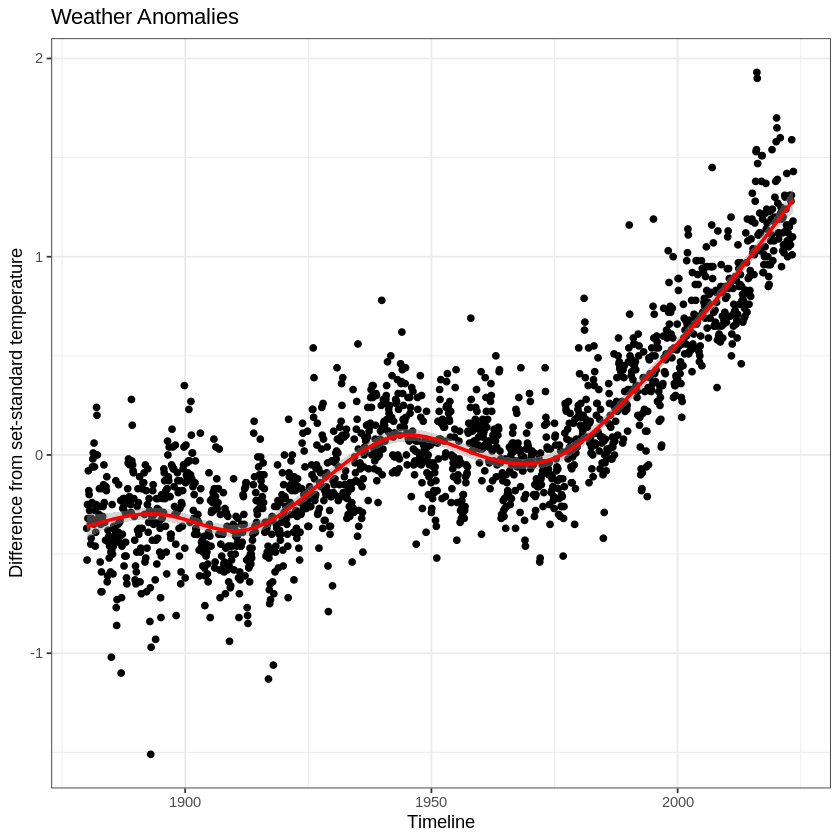

In [ ]:
#Let us plot the data using a time-series scatter plot, and add a
#trendline. To do that, we first need to create a new variable called
#`date` in order to ensure that the `delta` values are plot
#chronologically.

# ```{r scatter_plot, eval=FALSE}

# Approach - 1. create dataframe with requirements, i.e., convert month-year to year-month-date format
#            2. plot the graph - scatter plot - geom_point() with trendline - geom_smotth()

tidyweather <- tidyweather %>%
  mutate(date = ymd(paste(as.character(Year), month, "1")),                     # Adding date - for time-series graph
         month = month(date, label=TRUE))                                       # Adding month

head(tidyweather)

ggplot(tidyweather, aes(x=date, y = delta))+
  geom_point()+                                                                                             # for plotting scatter plot
  geom_smooth(color="red") +                                                                                # add trendline of colour red for better readability
  theme_bw() +                                                                                              # theme
  labs ( x= "Timeline", y= "Difference from set-standard temperature", title = "Weather Anomalies"          # labels
  )


Is the effect of increasing temperature more pronounced in some months?
Use `facet_wrap()` to produce a seperate scatter plot for each month,
again with a smoothing line. Your chart should human-readable labels;
that is, each month should be labeled "Jan", "Feb", "Mar" (full or
abbreviated month names are fine), not `1`, `2`, `3`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 5 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


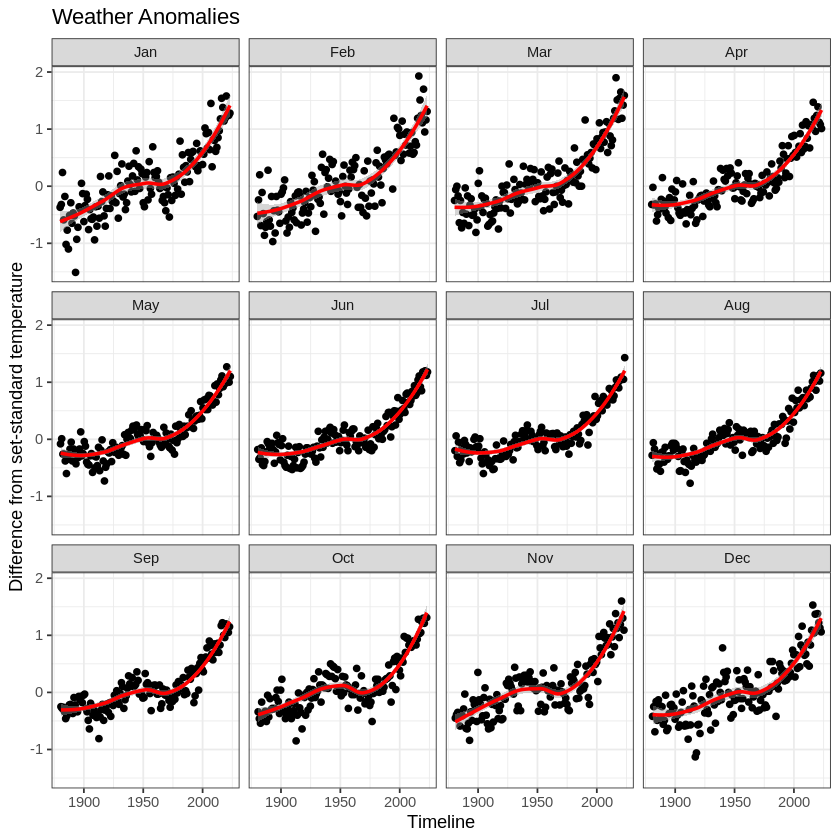

In [ ]:
# ```{r facet_wrap, echo=FALSE}

ggplot(tidyweather, aes(x=date, y = delta))+          #  X axis = Date, Y axis = Difference between temperatures - delta
  geom_point()+                                       # geom_point for scatter plot
  geom_smooth(color="red") +                          # geom_smooth to add trendline - Red color for better readability
  theme_bw() +
  facet_wrap(~month) +                                # facet_wrap to create plot month-wise
  labs (                                              # labels
    x= "Timeline", y= "Difference from set-standard temperature", title = "Weather Anomalies"
  )

Is the effect of increasing temperature more pronounced in some months?

Answer - ?

Remove data before 1800 and before using `filter`. Then, we use the
`mutate` function to create a new variable `interval` which contains
information on which period each observation belongs to

In [ ]:
# ```{r intervals, eval=FALSE}
# Approach - 1. filter non-required years group
#            2. categorize into required intervals

comparison <- tidyweather %>%
  filter(Year>= 1881) %>%                                                       # filter to remove years prior to 1881
  mutate(interval = case_when(                                                  # create new variable 'interval', and assign values based on criteria below:
    Year %in% c(1881:1920) ~ "1881-1920",
    Year %in% c(1921:1950) ~ "1921-1950",
    Year %in% c(1951:1980) ~ "1951-1980",
    Year %in% c(1981:2010) ~ "1981-2010",
    TRUE ~ "2011-present"
  ))

head(comparison)

Year,month,delta,date,interval
<dbl>,<ord>,<dbl>,<date>,<chr>
1881,Jan,-0.32,1881-01-01,1881-1920
1881,Feb,-0.24,1881-02-01,1881-1920
1881,Mar,-0.06,1881-03-01,1881-1920
1881,Apr,-0.02,1881-04-01,1881-1920
1881,May,0.01,1881-05-01,1881-1920
1881,Jun,-0.35,1881-06-01,1881-1920


Now that we have the `interval` variable, we can create a density plot
to study the distribution of monthly deviations (`delta`), grouped by
the different time periods we are interested in. Set `fill` to
`interval` to group and colour the data by different time periods.


Warning message in geom_density(ncol = 3):
“Ignoring unknown parameters: `ncol`”
Warning message:
“Removed 5 rows containing non-finite values (`stat_density()`).”


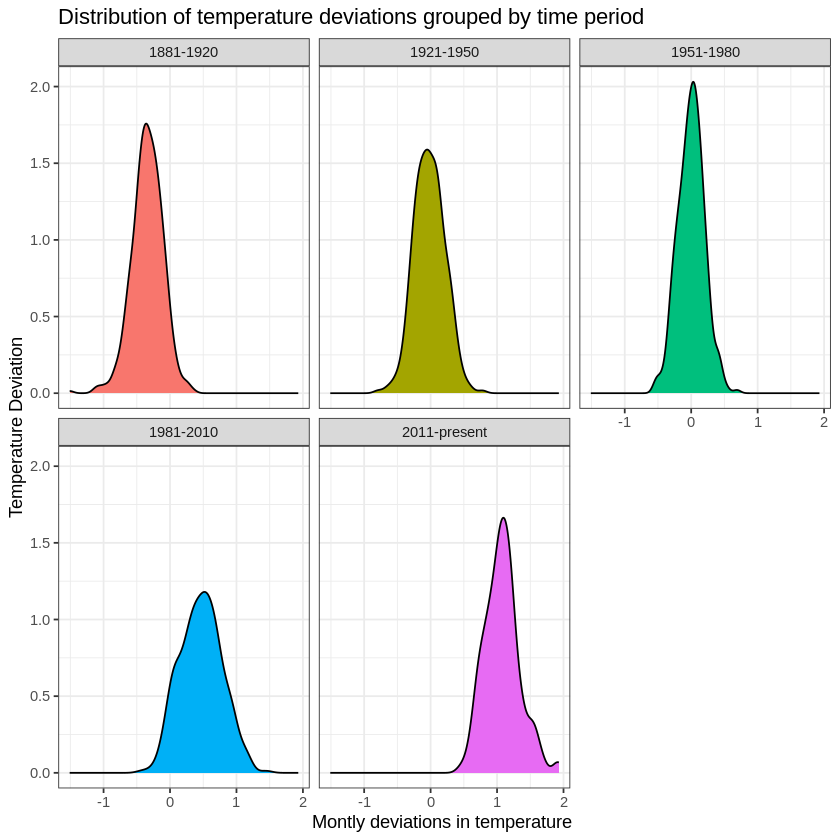

In [ ]:
# ```{r density_plot, eval=FALSE}
ggplot(comparison, aes(x = delta, fill = interval))+
  geom_density(ncol = 3)+                                                       # geom_density() - Density plot
  facet_wrap(~interval)+                                                        # facet_wrap() - plot by respective intervals
  theme_bw()+
  theme(legend.position = "none")+                                              # removing legen since we already categorized with facet_wrap
  labs(title = "Distribution of temperature deviations grouped by time period", # labels
       x = "Montly deviations in temperature ",
      y = "Temperature Deviation")

So far, we have been working with monthly anomalies. However, we might
be interested in average annual anomalies. We can do this by using
`group_by()` and `summarise()`, followed by a scatter plot to display
the result.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


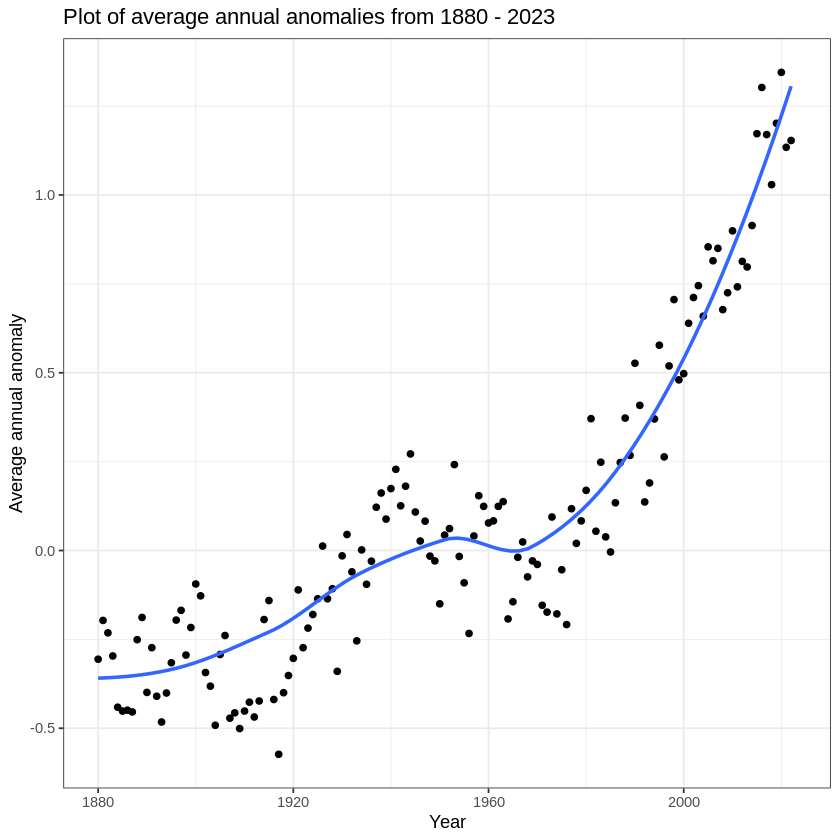

In [ ]:
# ```{r averaging, eval=FALSE}
average_annual_anomaly <- tidyweather %>%
  group_by(Year) %>%                                                            #grouping data by Year
  summarise(yearly_averages = mean(delta))                                      # creating summaries for mean delta
                                                                                # using `na.rm=TRUE` to eliminate NA (not available) values

#plotting the data:

ggplot(average_annual_anomaly, aes(y = yearly_averages, x = Year))+             # X axis = Year, Y axis = Yearly Averageof delta
              geom_point()+                                                     # scatter plot
              geom_smooth(method = "loess",se = F)+                             #method = "loess"
              theme_bw()+                                                       # black and white theme to have white background + black frame around plot
              labs(title = "Plot of average annual anomalies from 1880 - 2023", # labels
                   y = "Average annual anomaly")


Your task is to construct a confidence interval for the average annual
delta since 2011, both using a formula and using a bootstrap simulation
with the `infer` package. Recall that the dataframe `comparison` has
already grouped temperature anomalies according to time intervals; we
are only interested in what is happening between 2011-present.

95% confidence interval

In [ ]:
# Formula based Confidence Interval Calculations

# Approach - 1. create a new data_frame named = "formula_ci"
#            2. filter for interval to be 2011 and later
#            3. find mean delta, total occurences, standard error, lower ci and upper ci

formula_ci <- comparison %>%
  filter(interval == "2011-present") %>%
  summarize(
    mean_delta = mean(delta, na.rm = TRUE),                                     # Calculating mean
    n = n(),                                                                    # Calculating the number of occurrences
    se = sd(delta, na.rm = TRUE) / sqrt(n),                                     # Calculating standard error
    lower_ci = mean_delta - 1.96 * se,                                          # Calculating lower confidence interval limit
    upper_ci = mean_delta + 1.96 * se                                           # Calculating upper confidence interval limit
  )

formula_ci                                                                      # printing out formula_ci

cat("Formula-Based Confidence Interval (95%): [", formula_ci$lower_ci, ", ", formula_ci$upper_ci, "]\n")

mean_delta,n,se,lower_ci,upper_ci
<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.074172,156,0.02095138,1.033107,1.115237


Formula-Based Confidence Interval (95%): [ 1.033107 ,  1.115237 ]


In [ ]:
# Bootstrapping with infer package

set.seed(123)                                                           # setting random generator's seed

boot_delta <- comparison %>%
    filter(interval== "2011-present") %>%                               # filter on interval for required interval
    specify(response = delta) %>%                                       # specify the 'delta' as variable of interest
    generate(reps = formula_ci$n) %>%                                   # generate bootstrap samples
    calculate(stat = "mean")                                            # find the mean of each sample

percentile_ci <- boot_delta %>%
  get_confidence_interval(level = 0.95, type = "percentile")            # getting confidence interval


percentile_ci

Warning message:
“Removed 5 rows containing missing values.”
Setting `type = "bootstrap"` in `generate()`.


lower_ci,upper_ci
<dbl>,<dbl>
1.031515,1.108162


> What is the data showing us? Please type your answer after (and
> outside!) this blockquote. You have to explain what you have done, and
> the interpretation of the result. One paragraph max, please!

Answer - ??